# Gọi các thư viện cần thiết

In [ ]:
import os
import glob
import cv2
import joblib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Lấy các nhãn của bộ dữ liệu lưu vào một mảng

In [ ]:
labels = []
for root, dirs, files in os.walk('/content/drive/My Drive/Colab Notebooks/Training_new'):
    labels = dirs
    break

In [ ]:
labels = sorted(labels)
print(len(labels))
print(labels)

10
['Apple Braeburn', 'Apricot', 'Avocado', 'Avocado ripe', 'Banana', 'Beetroot', 'Blueberry', 'Cauliflower', 'Corn', 'Fig']


# Viết hàm để dán nhãn cho từng tấm hình

In [ ]:
def load_Data(X, Y, data_path):
    for label_i in range(len(labels)):
        for im_path in glob.glob(r"/content/drive/My Drive/Colab Notebooks/{0}/{1}/*.jpg".format(data_path, str(labels[label_i]))):
            X.append(cv2.imread(im_path))
            Y.append(labels[label_i])
            

# Viết hàm chuyển từng hình thành ảnh xám

In [ ]:
def rbgToGray(X):
    X_shaped = []
    for i in range(len(X)):
        grey = cv2.cvtColor(X[i], cv2.COLOR_BGR2GRAY)
        X_shaped.append(grey)
    X_shaped = np.array(X_shaped)
    return X_shaped

# Tải dữ liệu vào tập train-test

In [ ]:
X_train, Y_train, X_test, Y_test = [], [], [], []

load_Data(X_train, Y_train, 'Training_new')
load_Data(X_test, Y_test, 'Test_new')

In [ ]:
print(len(X_train))
print(len(Y_train))
print(len(X_test))
print(len(Y_test))

5158
5158
1725
1725


# Chuyển dữ liệu hình ảnh thành dạng ảnh xám

In [ ]:
X_train = rbgToGray(X_train)
X_test  = rbgToGray(X_test)

In [ ]:
print(X_test.shape)

(1725, 100, 100)


# Trực quan hóa dữ liệu

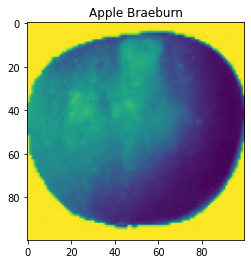

In [ ]:
plt.imshow(X_train[0])
plt.title(Y_train[0])
plt.savefig('grey_scale.png')
plt.show()

# Chuẩn hóa dữ liệu

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# Đổi chiều
nsample, nx, ny = X_train.shape
X_train = X_train.reshape((nsample, nx*ny))

nsample2, nx, ny = X_test.shape
X_test = X_test.reshape((nsample2, nx*ny))

# Scale
SC = StandardScaler()
X_train = SC.fit_transform(X_train)
X_test = SC.transform(X_test)

In [ ]:
print(X_train.shape)

(5158, 10000)


# Xây dựng model

Xây dựng mô hình bằng phương pháp KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# train model and store model
knn_minkowski_3 = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski')
knn_minkowski_3.fit(X_train, Y_train)
joblib.dump(knn_minkowski_3, '/content/drive/My Drive/Colab Notebooks/Models/knn_minkowski_3.pkl')

knn_minkowski_5 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski')
knn_minkowski_5.fit(X_train, Y_train)
joblib.dump(knn_minkowski_5, '/content/drive/My Drive/Colab Notebooks/Models/knn_minkowski_5.pkl')

knn_minkowski_7 = KNeighborsClassifier(n_neighbors = 7, metric = 'minkowski')
knn_minkowski_7.fit(X_train, Y_train)
joblib.dump(knn_minkowski_7, '/content/drive/My Drive/Colab Notebooks/Models/knn_minkowski_7.pkl')

knn_euclidean_3 = KNeighborsClassifier(n_neighbors = 3, metric = 'euclidean')
knn_euclidean_3.fit(X_train, Y_train)
joblib.dump(knn_euclidean_3, '/content/drive/My Drive/Colab Notebooks/Models/knn_euclidean_3.pkl')

knn_euclidean_5 = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')
knn_euclidean_5.fit(X_train, Y_train)
joblib.dump(knn_euclidean_5, '/content/drive/My Drive/Colab Notebooks/Models/knn_euclidean_5.pkl')

knn_euclidean_7 = KNeighborsClassifier(n_neighbors = 7, metric = 'euclidean')
knn_euclidean_7.fit(X_train, Y_train)
joblib.dump(knn_euclidean_7, '/content/drive/My Drive/Colab Notebooks/Models/knn_euclidean_7.pkl')


['/content/drive/My Drive/Colab Notebooks/Models/knn_euclidean_7.pkl']

Xây dựng mô hình bằng phương pháp SVM 

In [ ]:
from sklearn.svm import SVC

In [ ]:
# train model and store model
svm = SVC(kernel='linear')
svm.fit(X_train, Y_train)
joblib.dump(svm, '/content/drive/My Drive/Colab Notebooks/Models/svm.pkl')

['/content/drive/My Drive/Colab Notebooks/Models/svm.pkl']

Xây dựng mô hình bằng phương pháp LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# train model and store model
lgr = LogisticRegression(random_state = 0, max_iter=70000)
lgr.fit(X_train, Y_train)
joblib.dump(lgr, '/content/drive/My Drive/Colab Notebooks/Models/lgr.pkl')

['/content/drive/My Drive/Colab Notebooks/Models/lgr.pkl']

In [ ]:
loaded_model = joblib.load('/content/drive/My Drive/Colab Notebooks/Models/lgr.pkl')
y_pred = loaded_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy score: ", accuracy)

Accuracy score:  0.8556521739130435


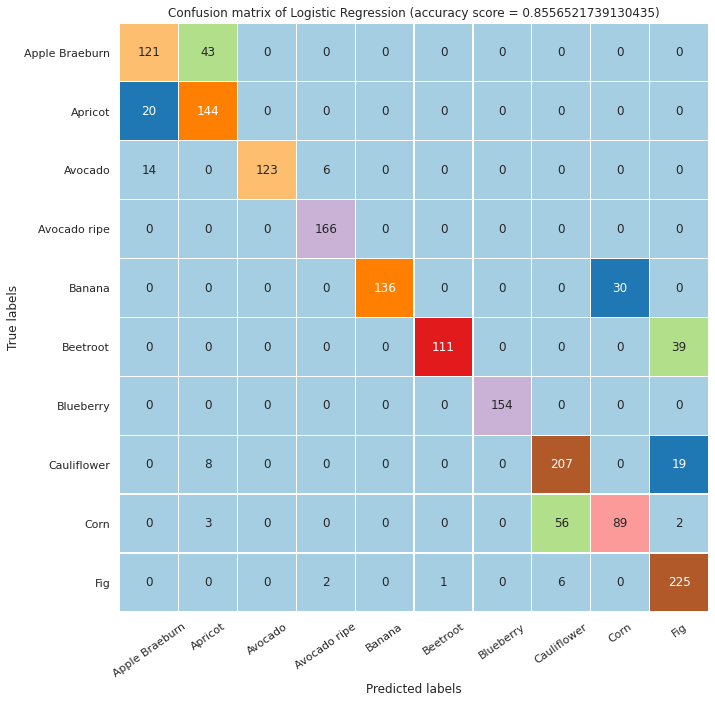

In [ ]:
cm = confusion_matrix(Y_test, y_pred)
df_cm = pd.DataFrame(cm, index=[i for i in labels], columns=[i for i in labels])

plt.figure(figsize=(10, 10))

sns.set(font_scale=1)

plt.title('Confusion matrix of Logistic Regression (accuracy score = {})'.format(str(accuracy)))

ax = sns.heatmap(df_cm, annot=True, square=True, fmt='d', linewidths=.2, cbar=0, cmap = "Paired")
ax.set_xticklabels(ax.get_xticklabels(), rotation=35)

plt.ylabel('True labels')
plt.xlabel('Predicted labels')
plt.tight_layout()

plt.savefig('/content/drive/My Drive/Colab Notebooks/Confusion matrix/cm_lgr.png')

plt.show()